# PRACTICAL 3 PART(B)
# NAME:KUNAL CHOURE
# ROLL NO :42

# Logistic Regression

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = pd.read_csv('dataset2.csv', encoding='ISO-8859-1')


In [22]:
data

,GRE Score (X1),GPA (X2),Prestige (X3),Admission Status (Y)
0,330,3.8,2,1
1,300,3.4,3,0
2,320,3.5,2,1
3,310,3.2,4,0
4,340,3.9,1,1


In [23]:

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [25]:
print(X_train)

[[300.    3.4   3. ]
 [310.    3.2   4. ]
 [340.    3.9   1. ]]


In [26]:
print(X_test)

[[320.    3.5   2. ]
 [330.    3.8   2. ]]


In [29]:
print(y_train)

[0 0 1]


In [30]:
print(y_test)

[1 1]


## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print(X_train)

[[-0.98058068 -0.33968311  0.26726124]
 [-0.39223227 -1.01904933  1.06904497]
 [ 1.37281295  1.35873244 -1.33630621]]


In [33]:
print(X_test)

[[ 0.19611614  0.         -0.53452248]
 [ 0.78446454  1.01904933 -0.53452248]]


## Training the Logistic Regression model on the Training set

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [36]:
print(classifier.predict(sc.transform([[340,3.2,2]])))

[0]


## Predicting the Test set results

In [37]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]]


## Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [1 1]]


0.5

## Visualising the Training set results

C:\Users\Kunal\AppData\Local\Temp\ipykernel_19684\3333143740.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


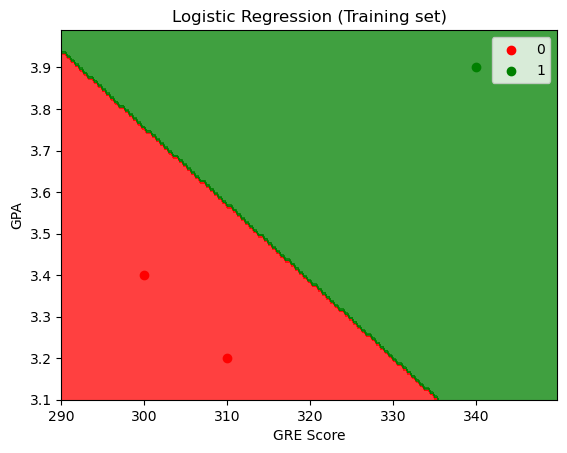

In [40]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 0.1, stop=X_set[:, 1].max() + 0.1, step=0.01))
X3 = np.zeros_like(X1) 

X_grid = np.array([X1.ravel(), X2.ravel(), X3.ravel()]).T
plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\Kunal\AppData\Local\Temp\ipykernel_19684\3187589966.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


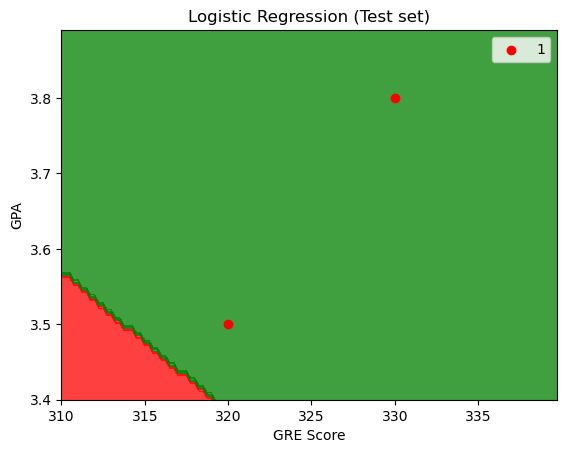

In [41]:
X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 0.1, stop=X_set[:, 1].max() + 0.1, step=0.01))
X3 = np.zeros_like(X1) 

X_grid = np.array([X1.ravel(), X2.ravel(), X3.ravel()]).T
plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()